# Predicting the price of a house in budapest using Machine learning 

### 1.1 getting the data
- All of the data here was collected with the `ingatlan_com_webscraping.py` script from https://ingatlan.com
- The program is made for scraping houses within specific districts
- The collection of data takes a significant time, due to bot detection (approx. 6 hours for each district)

In [91]:
import pandas as pd
import numpy as np 

In [92]:
first_second_third_part_1 = pd.read_csv("datasets/elso_masodik_harmadik_ker.csv")
first_second_third_part_2 = pd.read_csv("datasets/elso_masodik_harmadik_ker_ketto.csv")
first_second_third = pd.concat([first_second_third_part_1,first_second_third_part_2])
fourth_fifth_part_1 = pd.read_csv("datasets/negy_ot_egy.csv")
fourth_fifth_2 = pd.read_csv("datasets/negy_ot_ketto.csv")
fourth_fifth = pd.concat([fourth_fifth_part_1,fourth_fifth_2])
sixth = pd.read_csv("datasets/hatodik_ker.csv")
seventh = pd.read_csv("datasets/7ker_osszes.csv")
eigth_pt_1 = pd.read_csv("datasets/nyolcadik_ker.csv")
eigth_pt_2 = pd.read_csv("datasets/nyolcadik_ker_ketto.csv")
eigth = pd.concat([eigth_pt_1,eigth_pt_2])
ninth = pd.read_csv("datasets/kilencedik_ker.csv")
tenth = pd.read_csv("datasets/tizedik_ker.csv")
eleventh = pd.read_csv("datasets/tizenegyedik_ker_elso.csv")
twelveth = pd.read_csv("datasets/tizenkettedik_ker.csv")
thirteenth_1 = pd.read_csv("datasets/tizenharmadik_ker_elso.csv")
thirteenth_2 = pd.read_csv("datasets/tizenharmadik_ker_masodik.csv")
thirteenth = pd.concat([thirteenth_1,thirteenth_2])
fourteenth = pd.read_csv('datasets/ZugloiIngatlanok.csv')



In [93]:
#put all of the data together 
budapest_houses = pd.concat([first_second_third,fourth_fifth, sixth, seventh,eigth,ninth,tenth,eleventh,twelveth,thirteenth,fourteenth])
len(budapest_houses)

22500

## 1.3 filtering the relevant features 

In [94]:
print(budapest_houses.columns)

Index(['price', 'adress', 'size', 'rooms', 'half_rooms', 'balcony',
       'Ingatlan állapota', 'Építés éve', 'Komfort', 'Emelet',
       'Épület szintjei', 'Lift', 'Belmagasság', 'Légkondicionáló',
       'Akadálymentesített',
       'Átlag gázfogyasztás\n                            |info|',
       'Átlag áramfogyasztás\n                            |info|',
       'Rezsiköltség', 'Közös költség', 'Fürdő és wc', 'Tájolás', 'Kilátás',
       'Erkély mérete', 'Kertkapcsolatos', 'Tetőtér', 'Parkolás',
       'Parkolóhely ára', 'Fűtés', 'Szigetelés', 'Energiatanúsítvány',
       'Panelprogram', 'Energetikai tanúsítvány', 'Unnamed: 0'],
      dtype='object')


In [95]:
selected_columns = [
    'price', 'adress', 'size', 'rooms', 'half_rooms', 'balcony',
    'Ingatlan állapota', 'Építés éve', 'Komfort', 'Emelet',
     'Lift', 'Légkondicionáló',
    'Fürdő és wc', 'Tájolás', 'Kilátás',
    
]
budapest_houses_selected = budapest_houses[selected_columns]


In [96]:
column_translation = {
    'price': 'price',
    'adress': 'address',
    'size': 'size',
    'rooms': 'rooms',
    'half_rooms': 'half_rooms',
    'balcony': 'balcony',
    'Ingatlan állapota': 'property_condition',
    'Építés éve': 'construction_year',
    'Komfort': 'comfort',
    'Emelet': 'floor',
    'Lift': 'elevator',
    'Légkondicionáló': 'air_conditioning',
    'Fürdő és wc': 'bathroom_and_wc',
    'Tájolás': 'orientation',
    'Kilátás': 'view',
    
}

# Rename columns using the translation dictionary
budapest_houses_selected = budapest_houses_selected.rename(columns=column_translation)
budapest_houses_selected

,price,address,size,rooms,half_rooms,balcony,property_condition,construction_year,comfort,floor,elevator,air_conditioning,bathroom_and_wc,orientation,view
0,57.30,"III. kerület, Pünkösdfürdő utca",44.0,2.0,0.0,4.18,új építésű,2023,duplakomfortos,7,van,|nincs megadva|,külön helyiségben,észak,utcai
1,765.00,"II. kerület, Bem rakpart",150.0,4.0,0.0,NaN,felújított,1950 előtt,luxus,2,van,van,külön helyiségben,kelet,panorámás
2,199.00,"II. kerület, Pasaréti út 84b",98.0,3.0,0.0,34.00,újszerű,2012,összkomfortos,3,van,van,külön és egyben is,délkelet,panorámás
3,40.90,"III. kerület, Juhász Gyula utca 2.",51.0,2.0,0.0,4.00,felújított,1950 és 1980 között,összkomfortos,4,van,van,külön helyiségben,nyugat,panorámás
4,64.90,"III. kerület, Váradi utca",66.0,3.0,0.0,6.00,felújított,|nincs megadva|,összkomfortos,3,nincs,nincs,külön helyiségben,|nincs megadva|,kertre néz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,49.90,"XIV. kerület, Alsórákos",67.0,3.0,0.0,NaN,|nincs megadva|,|nincs megadva|,|nincs megadva|,2,nincs,|nincs megadva|,|nincs megadva|,kelet,utcai
1836,66.90,"XIV. kerület, Herminamező",65.0,3.0,0.0,1.00,felújított,1950 és 1980 között,|nincs megadva|,2,|nincs megadva|,|nincs megadva|,|nincs megadva|,délnyugat,udvari
1837,42.00,"XIV. kerület, Egressy út 80.",49.0,1.0,1.0,NaN,felújított,|nincs megadva|,összkomfortos,1,|nincs megadva|,|nincs megadva|,egy helyiségben,|nincs megadva|,utcai
1838,37.99,"XIV. kerület, Alsórákos - Füredi utcai lakótelep",46.0,2.0,0.0,NaN,felújított,1950 és 1980 között,|nincs megadva|,8,van,|nincs megadva|,|nincs megadva|,délnyugat,utcai


## 1.4.1 getting the data ready 

In [97]:
HAS_ENCODING_FOR_AC = {
    "van" : True,
    "nincs" : False,
    "|nincs megadva|" : False
    }
HAS_ENCODING_FOR_ELEVATOR = {
    "van" : True,
    "nincs" : False
    }    


def Floor_Parse(x):
    if "földszint" in str(x):
        return 0
    else:
        try:
            return float(x)
        except:
            pass
def Construction_Year_Parse(x):
    x = str(x).split()
    if len(x) > 2:
        try:
            return (float(x[0]) + float(x[2])) / 2
        except:
            pass
    elif len(x) > 1: 
        try:
            return float(x[0])
        except:
            pass
    elif len(x) == 1:
        try:
            return float(x[0])
        except:
            pass
def adress_parse_to_district(x):
    x = str(x).split()
    try:
        return x[0]
    except:
        pass


In [98]:
budapest_houses_selected["air_conditioning"] = budapest_houses_selected["air_conditioning"].map(HAS_ENCODING_FOR_AC)
budapest_houses_selected["elevator"] = budapest_houses_selected["elevator"].map(HAS_ENCODING_FOR_ELEVATOR)
#budapest_houses_selected["construction_year"] = budapest_houses_selected["construction_year"].apply(lambda x : Construction_Year_Parse(x))
budapest_houses_selected["balcony"].fillna(0,inplace=True)
budapest_houses_selected["address"] = budapest_houses_selected["address"].apply(lambda x : adress_parse_to_district(x))
budapest_houses_selected["floor"] = budapest_houses_selected["floor"].apply(lambda x : Floor_Parse(x))
budapest_houses_selected["floor"].fillna(0,inplace=True)
budapest_houses_selected["elevator"].fillna(False,inplace=True)

In [99]:
budapest_houses_selected["price/sqmetre"] = budapest_houses_selected['price'] / budapest_houses_selected['size']

## 1.4.2 exploring the data

In [100]:
average_price_per_district = budapest_houses_selected.groupby('address')['price/sqmetre'].mean() 

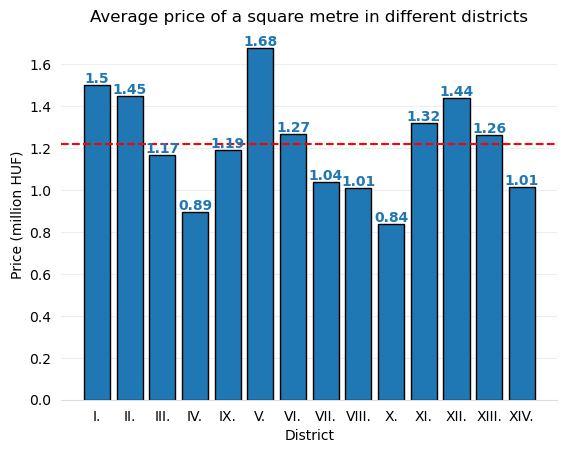

<Figure size 2000x1500 with 0 Axes>

In [101]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
plt.figure(figsize=(20,15))
bars = ax.bar(average_price_per_district.index ,average_price_per_district.values,width=0.8,edgecolor='black')
ax.set_ylabel('Price (million HUF)')
ax.set_xlabel('District')
ax.set_title('Average price of a square metre in different districts')
ax.axhline(y=average_price_per_district.values.mean(),c='r',linestyle='--',label='Average')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.01,
      s = str(round(bar.get_height(), 2)),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

plt.show();


In [102]:
#price/sqmetre must be dropped before training
budapest_houses_selected.drop(["price/sqmetre"],axis=1,inplace=True)
budapest_houses_selected.isna().sum()
budapest_houses_selected.dropna(inplace=True)


## 2.0 Finding the ideal machine learning model and training it 

In [103]:
X = budapest_houses_selected.drop("price", axis=1)
y = budapest_houses_selected["price"]

In [104]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
budapest_houses_selected.dropna()
# 2. Define the categorical features to transform
categorical_features = ["address", "property_condition","construction_year","comfort","elevator","air_conditioning","bathroom_and_wc","orientation","view"]

# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged) 

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_X = transformer.fit_transform(X)
transformed_X

<22399x76 sparse matrix of type '<class 'numpy.float64'>'
	with 277405 stored elements in Compressed Sparse Row format>

In [105]:
len(X)

22399

### 2.1 Experimenting with Ridge model

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7174252089918969

### 2.2 RandomForestRegressor

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)



RandomForestRegressor(n_estimators=300)

In [128]:
model.score(X_test,y_test)

0.8299686971560494

In [129]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [130]:
y_preds= model.predict(X_test)


print("r2 score:",r2_score(y_true=y_test,y_pred=y_preds) )
print("MAE:" ,mean_absolute_error(y_test,y_preds))
print("MSE:" ,mean_squared_error(y_test,y_preds))

r2 score: 0.8299686971560494
MAE: 13.779804368064687
MSE: 926.5126518124939


In [131]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df

,actual values,predictions
129,75.0,78.967167
1644,69.0,79.482870
777,52.5,52.582500
92,64.4,61.390133
707,44.9,34.086833
...,...,...
376,89.0,96.819000
586,650.0,569.975467
624,269.0,175.380233
903,84.9,103.703767


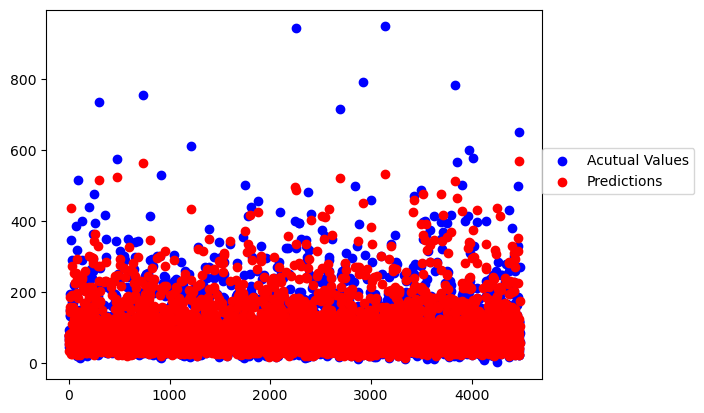

In [132]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

In [120]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_acc = cross_val_score(model, transformed_X,y ,cv=5) 
cv_acc.mean()

In [ ]:
cv_acc

In [73]:
#import pickle

#pickle.dump(model, open("random_forest_81_percent.pkl", "wb"))

## 2.3 Lasso 

In [114]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)

Lasso(alpha=0.1)

In [115]:
clf.score(X_test,y_test)

0.7496354456648003

In [117]:
from sklearn.model_selection import cross_val_score
cv_acc_lasso = cross_val_score(clf,transformed_X,y,cv=5)
cv_acc_lasso.mean()

0.6670764456901718

## 3 Tuning the best baseline model

In [126]:
param_grid = {"n_estimators": [200, 1000],
              "max_depth": [30, 40, 50],
              "max_features": ["log2"],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [4]}

In [ ]:
import time
start_time = time.time()
np.random.seed(42)


from sklearn.model_selection import GridSearchCV, train_test_split
model = RandomForestRegressor(n_jobs=-1)
